In [38]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [12]:
df = pd.read_csv("spotify.csv")
print("Dimensiones del dataset :", df.shape)
df.head()
print(df.info())

Dimensiones del dataset : (114000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-

In [19]:
df1 = df.dropna()
columns_to_keep = ['tempo','track_genre','popularity','artists']
df1 = df1[columns_to_keep]
df1.head()

,tempo,track_genre,popularity,artists
0,87.917,acoustic,73,Gen Hoshino
1,77.489,acoustic,55,Ben Woodward
2,76.332,acoustic,57,Ingrid Michaelson;ZAYN
3,181.740,acoustic,71,Kina Grannis
4,119.949,acoustic,82,Chord Overstreet


In [50]:
df1['track_genre_encoded'] = LabelEncoder().fit_transform(df1['track_genre'])
columns_to_keep = ['artists','track_genre', 'track_genre_encoded', 'tempo','popularity']
df1 = df1[columns_to_keep]
df1.head()

,artists,track_genre,track_genre_encoded,tempo,popularity
0,Gen Hoshino,acoustic,0,87.917,73
1,Ben Woodward,acoustic,0,77.489,55
2,Ingrid Michaelson;ZAYN,acoustic,0,76.332,57
3,Kina Grannis,acoustic,0,181.740,71
4,Chord Overstreet,acoustic,0,119.949,82


In [54]:
def calcular_correlacion(x, y):
    correlacion = np.corrcoef(x, y)[0, 1]
    return correlacion
popularity = df1['popularity']
track_genre = df1['track_genre_encoded']

correlacion = calcular_correlacion(popularity, track_genre)
print("La correlación entre horas de popularity y genero del artista es:", correlacion)

La correlación entre horas de popularity y genero del artista es: 0.032695690825939774


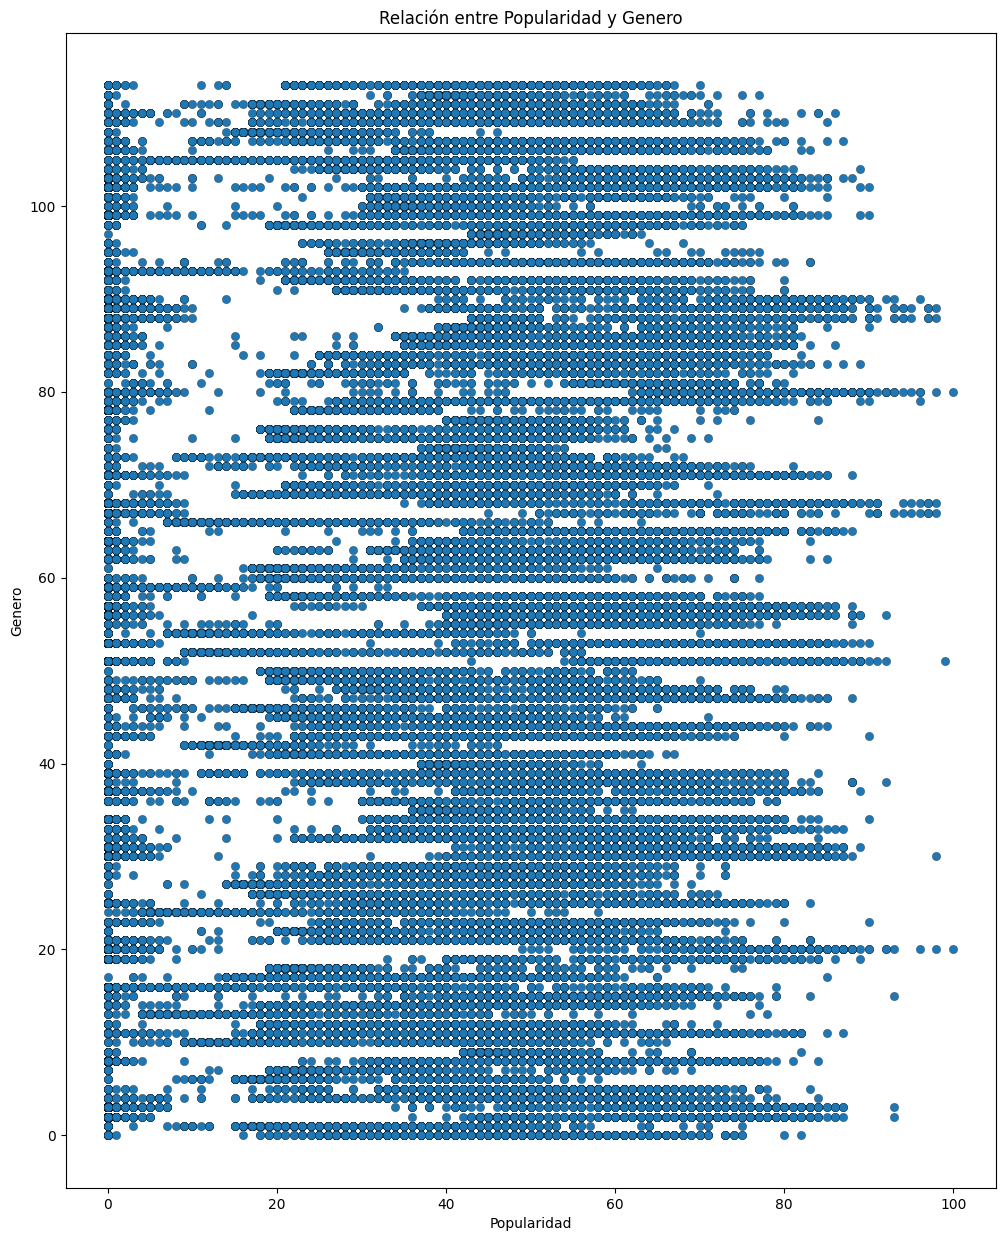

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 15))
plt.scatter(popularity, track_genre, linewidths=0.2, edgecolors='black')
plt.xlabel('Popularidad')
plt.ylabel('Genero')
plt.title('Relación entre Popularidad y Genero')
plt.show()


In [117]:
df2 = df1.groupby('track_genre_encoded')['popularity'].sum().reset_index()

df2.columns = ['track_genre_encoded', 'popularity_sum']

df2.head()

,track_genre_encoded,popularity_sum
0,0,42483
1,1,24399
2,2,33943
3,3,24337
4,4,44191


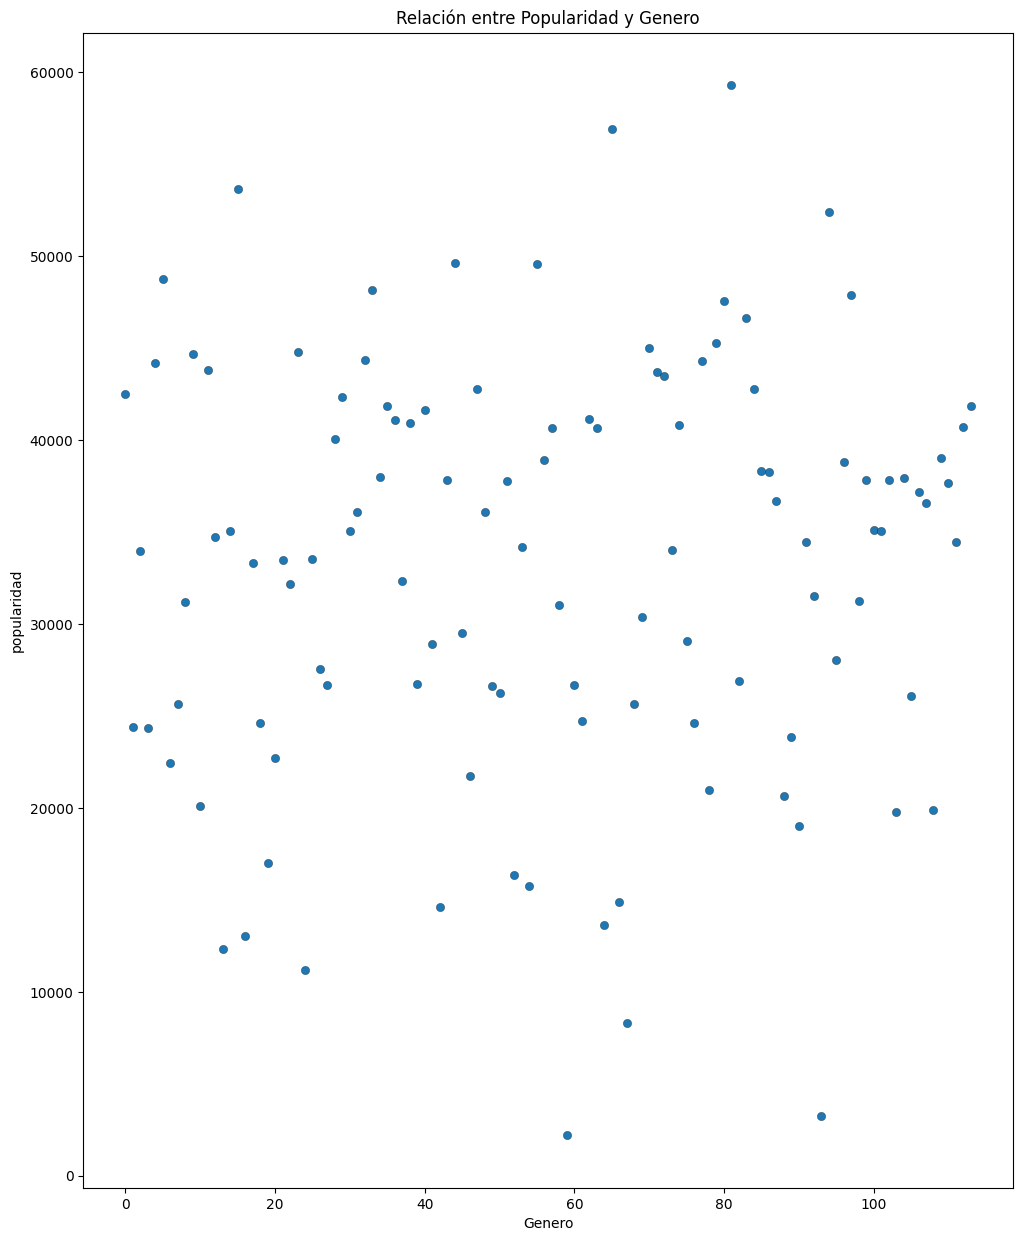

In [118]:
import matplotlib.pyplot as plt

popularity = df2['popularity_sum']
track_genre = df2['track_genre_encoded']

plt.figure(figsize=(12, 15))
plt.scatter(track_genre, popularity, linewidths=0.2, edgecolors='black')
plt.xlabel('Genero')
plt.ylabel('popularidad')
plt.title('Relación entre Popularidad y Genero')
plt.show()

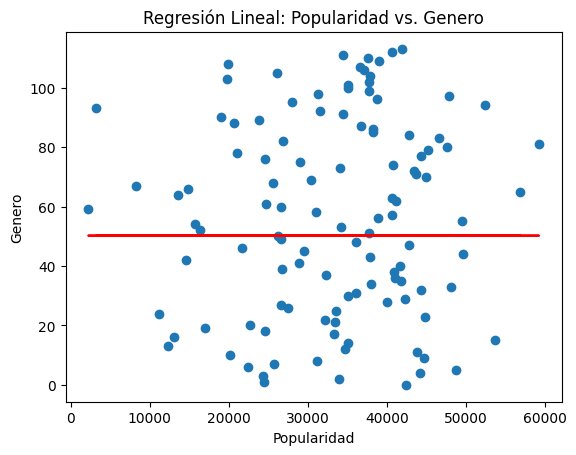

In [120]:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(popularity.values.reshape(-1, 1), track_genre)

plt.scatter(popularity, track_genre)
plt.plot(popularity, modelo_regresion.predict(track_genre.values.reshape(-1, 1)), color='red')
plt.xlabel('Popularidad')
plt.ylabel('Genero')
plt.title('Regresión Lineal: Popularidad vs. Genero')
plt.show()

In [124]:
df2.corr()


,track_genre_encoded,popularity_sum
track_genre_encoded,1.000000,0.064845
popularity_sum,0.064845,1.000000
